In [12]:
using VegaLite
using Pkg
Pkg.add("VegaDatasets")
using VegaDatasets
using Pkg
Pkg.add("DataFrames")
using DataFrames

  Resolving package versions...
No Changes to `C:\Users\i am\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\i am\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\i am\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\i am\.julia\environments\v1.5\Manifest.toml`


In [22]:
dataset("flare")

id,name,parent,size
1,"""flare""",#NA,#NA
2,"""analytics""",1,#NA
3,"""cluster""",2,#NA
4,"""AgglomerativeCluster""",3,3938
5,"""CommunityStructure""",3,3812
6,"""HierarchicalCluster""",3,6714
7,"""MergeEdge""",3,743
8,"""graph""",2,#NA
9,"""BetweennessCentrality""",8,3534
10,"""LinkDistance""",8,5731


In [27]:
using CSV
mylab = CSV.read("LABELS.txt")

,id,name,parent
,Int64,String,Int64?
1,1,GROUP,missing
2,2,HEADER,1
3,3,ATTRIBUTES,1
4,4,DATASET,1
5,5,NAME,3
6,6,DATATYTPE,3
7,7,DATASPACE,3
8,8,DATA,3
9,9,HEADER,4


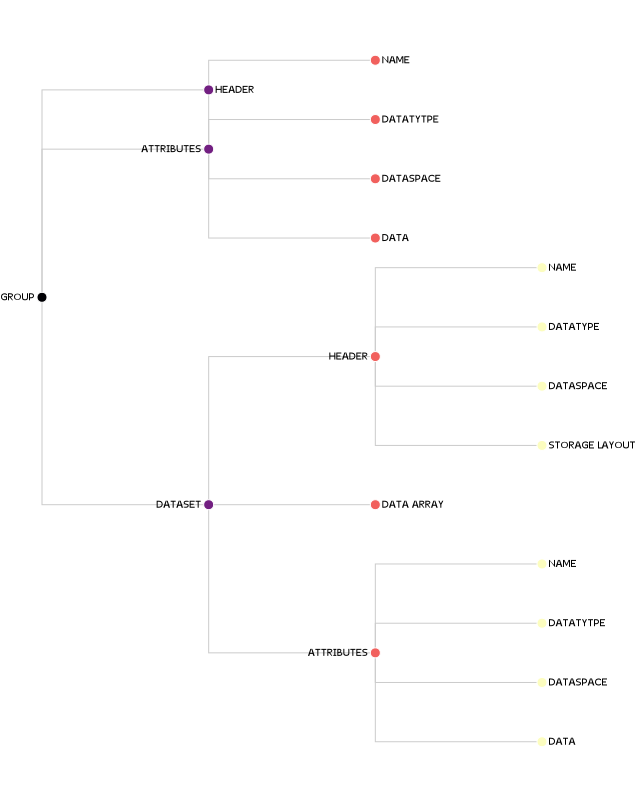

In [11]:
dataset("flare")

id,name,parent,size
1,"""flare""",#NA,#NA
2,"""analytics""",1,#NA
3,"""cluster""",2,#NA
4,"""AgglomerativeCluster""",3,3938
5,"""CommunityStructure""",3,3812
6,"""HierarchicalCluster""",3,6714
7,"""MergeEdge""",3,743
8,"""graph""",2,#NA
9,"""BetweennessCentrality""",8,3534
10,"""LinkDistance""",8,5731
